In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

np.random.seed(123)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("anylogic_dataset_800.csv")
data.head()


,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time
0,307,2733.266310,1068,790819.8329,265,0,803,594288.74260,787,16,289.331424,284.788121,6000,20834.143720,0.201158,212.884740
1,310,1400.104299,314,235023.5362,269,0,45,34683.77499,26,19,167.861449,157.939327,6000,492.803679,13.768739,14.850158
2,313,1193.868292,380,287256.1731,313,0,67,52298.72333,25,42,240.609601,212.596029,6000,-1222.103462,7.935582,15.792537
3,316,1797.806593,428,320964.2627,131,0,297,222200.04570,297,0,178.531030,178.531030,6000,12359.507780,0.461767,123.595078
4,319,1333.797887,322,243113.6927,139,0,183,137793.91030,183,0,182.271763,182.271763,6000,10330.943820,0.953057,103.309438


In [3]:
#shuffle the dataset
data = data.sample(frac=1)
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time
145,742,1941.363448,601,454112.1978,276,0,325,244987.7572,271,54,233.914056,213.547394,6000,8546.033628,1.889005,105.826998
571,2327,2761.908509,800,601453.1785,247,0,553,417387.6325,542,11,217.767235,214.683358,6000,14495.514910,0.249898,148.039026
229,994,3362.202157,916,683848.9494,145,0,771,574738.0715,770,1,203.393168,203.127732,6000,17041.009010,0.170618,170.675526
202,913,1051.868417,252,189365.2455,42,0,210,157055.3680,150,60,180.027504,136.764726,6000,6278.529612,4.744965,106.048073
185,862,2072.033006,506,378822.3153,93,0,413,311976.9235,380,33,182.826390,170.687379,6000,12628.759220,1.087380,138.426603


In [4]:
data.reset_index(inplace=True,drop=True)
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time
0,742,1941.363448,601,454112.1978,276,0,325,244987.7572,271,54,233.914056,213.547394,6000,8546.033628,1.889005,105.826998
1,2327,2761.908509,800,601453.1785,247,0,553,417387.6325,542,11,217.767235,214.683358,6000,14495.514910,0.249898,148.039026
2,994,3362.202157,916,683848.9494,145,0,771,574738.0715,770,1,203.393168,203.127732,6000,17041.009010,0.170618,170.675526
3,913,1051.868417,252,189365.2455,42,0,210,157055.3680,150,60,180.027504,136.764726,6000,6278.529612,4.744965,106.048073
4,862,2072.033006,506,378822.3153,93,0,413,311976.9235,380,33,182.826390,170.687379,6000,12628.759220,1.087380,138.426603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   vehicle_id              800 non-null    int64  
 1   vehicle_localmips       800 non-null    float64
 2   total_tasks             800 non-null    int64  
 3   total_task_mips         800 non-null    float64
 4   tasks_completed_local   800 non-null    int64  
 5   local_failed            800 non-null    int64  
 6   tasks_from_others       800 non-null    int64  
 7   other_task_mips         800 non-null    float64
 8   others_completed        800 non-null    int64  
 9   others_failed           800 non-null    int64  
 10  total_execution_time    800 non-null    float64
 11  total_computation_time  800 non-null    float64
 12  simulation_time         800 non-null    int64  
 13  trust_factor            800 non-null    float64
 14  z_score                 800 non-null    fl

In [6]:
df = pd.DataFrame(data['trust_factor'])
x = df[['trust_factor']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.round(1)
data["normalized_trust_values"] = df_normalized
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time,normalized_trust_values
0,742,1941.363448,601,454112.1978,276,0,325,244987.7572,271,54,233.914056,213.547394,6000,8546.033628,1.889005,105.826998,0.5
1,2327,2761.908509,800,601453.1785,247,0,553,417387.6325,542,11,217.767235,214.683358,6000,14495.514910,0.249898,148.039026,0.7
2,994,3362.202157,916,683848.9494,145,0,771,574738.0715,770,1,203.393168,203.127732,6000,17041.009010,0.170618,170.675526,0.8
3,913,1051.868417,252,189365.2455,42,0,210,157055.3680,150,60,180.027504,136.764726,6000,6278.529612,4.744965,106.048073,0.4
4,862,2072.033006,506,378822.3153,93,0,413,311976.9235,380,33,182.826390,170.687379,6000,12628.759220,1.087380,138.426603,0.6


In [7]:
criteria = [data['normalized_trust_values'].between(0.0, 0.3), data['normalized_trust_values'].between(0.4, 0.6), data['normalized_trust_values'].between(0.7, 1.0)]
# values = ['Malicious', 'Partially Trusted', 'Trusted']
values = [0, 1, 2]

data['trust_labels'] = np.select(criteria, values, 0)
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time,normalized_trust_values,trust_labels
0,742,1941.363448,601,454112.1978,276,0,325,244987.7572,271,54,233.914056,213.547394,6000,8546.033628,1.889005,105.826998,0.5,1
1,2327,2761.908509,800,601453.1785,247,0,553,417387.6325,542,11,217.767235,214.683358,6000,14495.514910,0.249898,148.039026,0.7,2
2,994,3362.202157,916,683848.9494,145,0,771,574738.0715,770,1,203.393168,203.127732,6000,17041.009010,0.170618,170.675526,0.8,2
3,913,1051.868417,252,189365.2455,42,0,210,157055.3680,150,60,180.027504,136.764726,6000,6278.529612,4.744965,106.048073,0.4,1
4,862,2072.033006,506,378822.3153,93,0,413,311976.9235,380,33,182.826390,170.687379,6000,12628.759220,1.087380,138.426603,0.6,1


In [8]:
data = data.drop(['vehicle_id', 'simulation_time', 'trust_factor', 'z_score'], axis=1)
data = data.drop(['normalized_trust_values', 'local_failed'], axis=1)

In [9]:
pd.set_option('float_format', '{:f}'.format)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_localmips,800.000000,2234.627797,730.957858,1002.883792,1578.471382,2270.615249,2884.001215,3490.773797
total_tasks,800.000000,592.560000,207.993234,224.000000,431.000000,583.000000,739.000000,1184.000000
total_task_mips,800.000000,444183.192650,155797.026968,165439.599100,323710.687800,437143.258450,551286.627500,885765.413700
tasks_completed_local,800.000000,166.661250,89.751954,26.000000,101.000000,151.000000,210.250000,598.000000
tasks_from_others,800.000000,425.898750,172.580085,45.000000,290.750000,410.000000,525.250000,982.000000
other_task_mips,800.000000,319240.798556,129178.395349,34683.774990,218512.846950,307237.309850,394702.536600,732807.080000
others_completed,800.000000,392.661250,188.391316,5.000000,240.750000,384.500000,506.000000,982.000000
others_failed,800.000000,33.237500,40.328732,0.000000,1.000000,18.000000,51.000000,216.000000
total_execution_time,800.000000,201.976072,42.452232,117.640954,170.842238,182.657233,233.637949,331.808986
total_computation_time,800.000000,185.258953,40.047876,82.645617,156.219808,174.191501,215.775038,300.843758


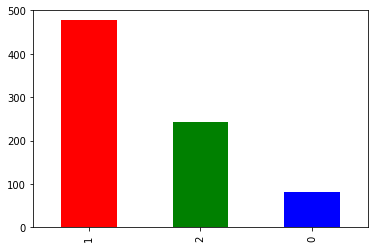

In [39]:
data['trust_labels'].value_counts().plot(kind = 'bar', color=['r', 'g', 'b'])

In [11]:
data['trust_labels'].value_counts()

1    477
2    242
0     81
Name: trust_labels, dtype: int64

In [12]:
#check missing
data.isnull().sum().sum()

0

In [13]:
#data['avgmips_per_task'] = data['other_task_mips'] / data['tasks_from_others']
#data['avgcomp_per_task'] = data['other_total_comp_time'] / data['others_completed']
#data.head()

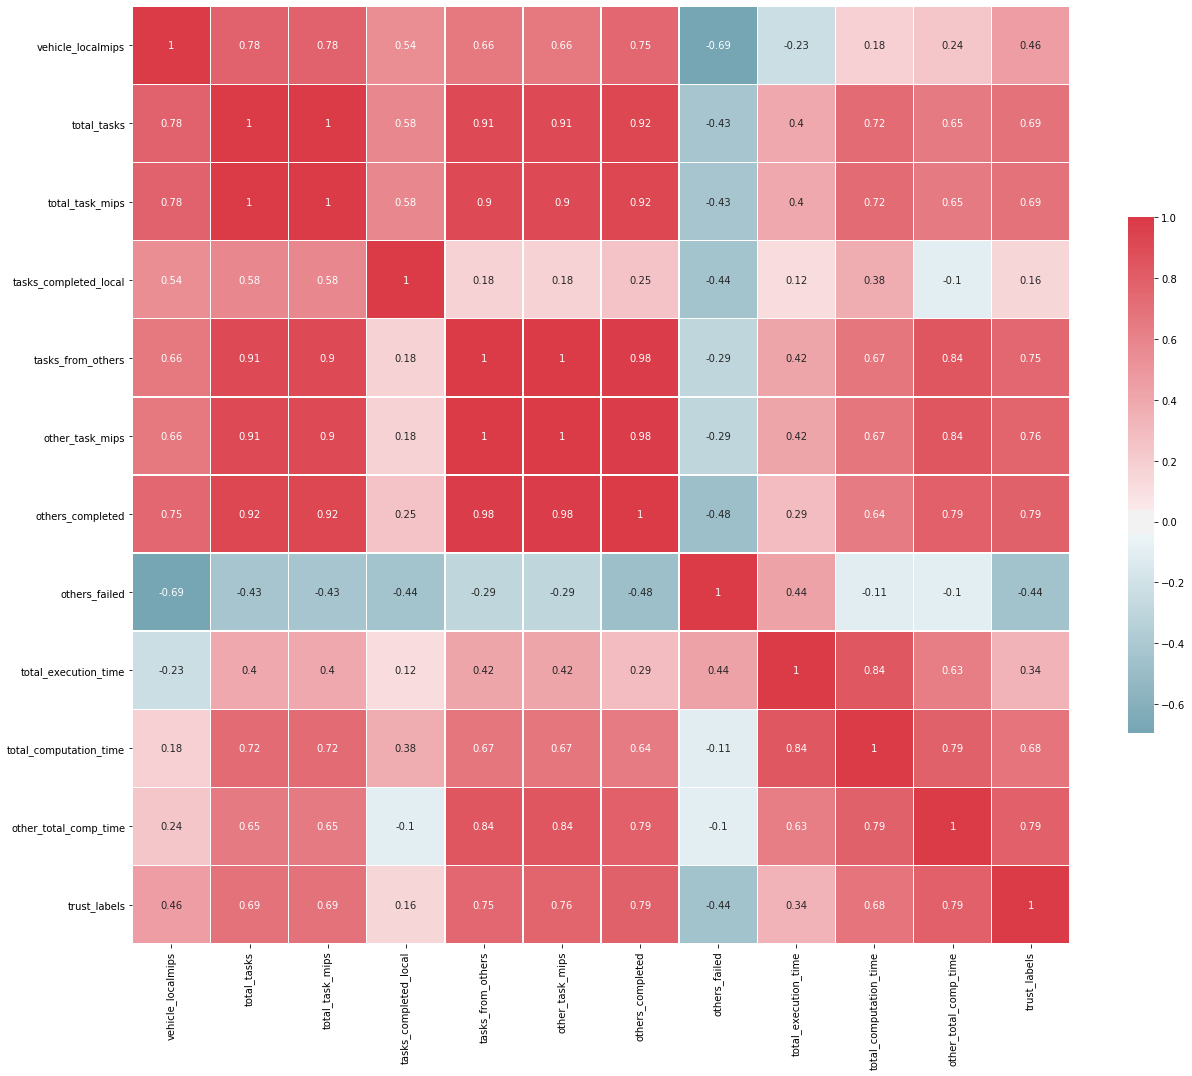

In [14]:
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [15]:
corr

,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,other_total_comp_time,trust_labels
vehicle_localmips,1.000000,0.776702,0.777077,0.537716,0.656435,0.656654,0.750016,-0.694517,-0.230968,0.181258,0.238603,0.456628
total_tasks,0.776702,1.000000,0.999751,0.576734,0.905262,0.905364,0.922117,-0.433651,0.403502,0.722171,0.653756,0.694556
total_task_mips,0.777077,0.999751,1.000000,0.577882,0.904366,0.904895,0.921419,-0.434229,0.403145,0.722116,0.652747,0.694647
tasks_completed_local,0.537716,0.576734,0.577882,1.000000,0.175019,0.175765,0.254781,-0.441214,0.120288,0.381178,-0.104771,0.158749
tasks_from_others,0.656435,0.905262,0.904366,0.175019,1.000000,0.999735,0.978833,-0.293178,0.423743,0.672125,0.842393,0.754519
other_task_mips,0.656654,0.905364,0.904895,0.175765,0.999735,1.000000,0.978697,-0.293678,0.423962,0.672700,0.842594,0.755207
others_completed,0.750016,0.922117,0.921419,0.254781,0.978833,0.978697,1.000000,-0.482641,0.294767,0.639323,0.793823,0.786088
others_failed,-0.694517,-0.433651,-0.434229,-0.441214,-0.293178,-0.293678,-0.482641,1.000000,0.436363,-0.110281,-0.103378,-0.443284
total_execution_time,-0.230968,0.403502,0.403145,0.120288,0.423743,0.423962,0.294767,0.436363,1.000000,0.836353,0.626873,0.341605
total_computation_time,0.181258,0.722171,0.722116,0.381178,0.672125,0.672700,0.639323,-0.110281,0.836353,1.000000,0.786495,0.677823


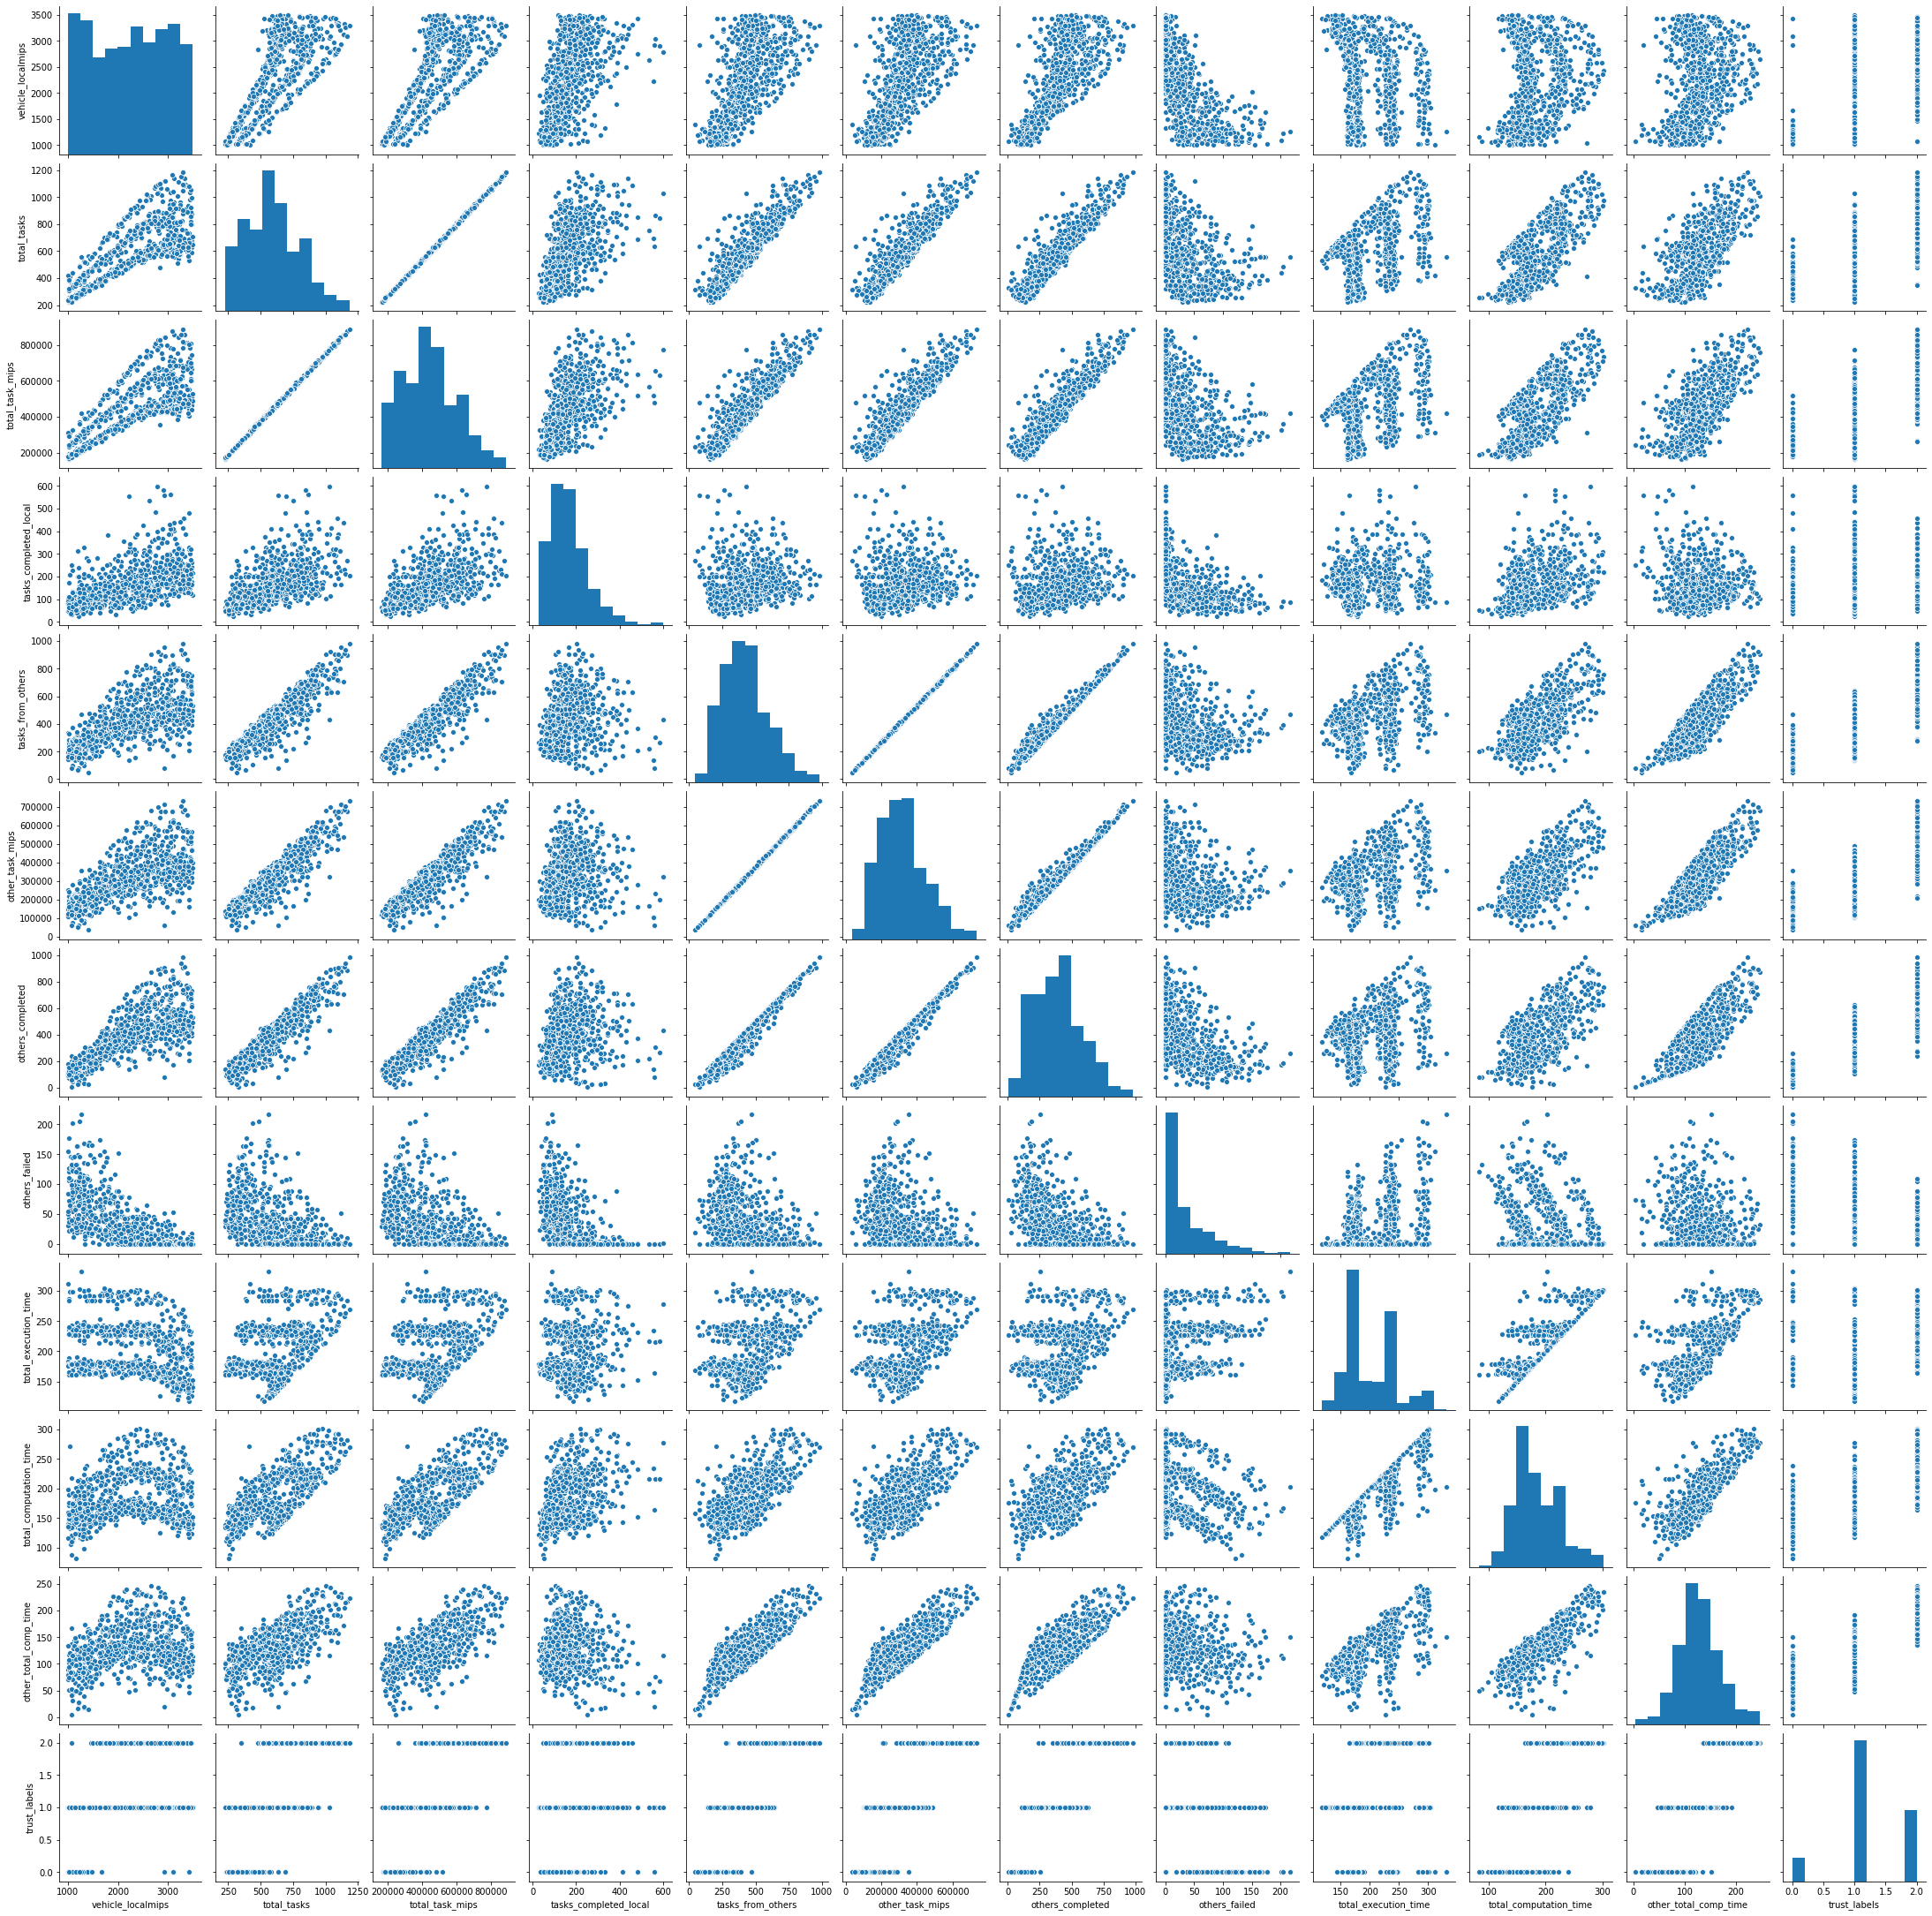

In [16]:
sns.pairplot(data);

In [18]:
len(data.columns)

12

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored k features
select_feature = SelectKBest(chi2, k='all').fit(data.drop('trust_labels',axis = 1 ), data['trust_labels'])

print('Score list:', select_feature.scores_)
print('Feature list:', data.columns)
select_feature

Score list: [4.62891337e+04 2.88533221e+04 2.16021363e+07 9.87465478e+02
 3.29562217e+04 2.46739945e+07 4.48995454e+04 1.18295017e+04
 2.16449627e+03 3.53894737e+03 6.48014724e+03]
Feature list: Index(['vehicle_localmips', 'total_tasks', 'total_task_mips',
       'tasks_completed_local', 'tasks_from_others', 'other_task_mips',
       'others_completed', 'others_failed', 'total_execution_time',
       'total_computation_time', 'other_total_comp_time', 'trust_labels'],
      dtype='object')


SelectKBest(k='all', score_func=<function chi2 at 0x0000026763B973A8>)

In [20]:
select_feature.transform(data.drop('trust_labels',axis = 1))

array([[1.94136345e+03, 6.01000000e+02, 4.54112198e+05, ...,
        2.33914056e+02, 2.13547394e+02, 1.05826998e+02],
       [2.76190851e+03, 8.00000000e+02, 6.01453179e+05, ...,
        2.17767235e+02, 2.14683358e+02, 1.48039026e+02],
       [3.36220216e+03, 9.16000000e+02, 6.83848949e+05, ...,
        2.03393168e+02, 2.03127732e+02, 1.70675526e+02],
       ...,
       [1.47191347e+03, 4.54000000e+02, 3.43743736e+05, ...,
        2.33535289e+02, 1.88320458e+02, 6.66114419e+01],
       [1.82261736e+03, 7.31000000e+02, 5.50084632e+05, ...,
        3.01810268e+02, 2.73317436e+02, 2.09886884e+02],
       [1.01276685e+03, 3.21000000e+02, 2.42530939e+05, ...,
        2.39473616e+02, 1.56351948e+02, 7.49624246e+01]])

In [21]:
selected_columns = np.array(data.drop('trust_labels',axis = 1).columns)[select_feature.get_support()]
selected_columns

array(['vehicle_localmips', 'total_tasks', 'total_task_mips',
       'tasks_completed_local', 'tasks_from_others', 'other_task_mips',
       'others_completed', 'others_failed', 'total_execution_time',
       'total_computation_time', 'other_total_comp_time'], dtype=object)

In [22]:
ABT = pd.DataFrame(select_feature.transform(data.drop('trust_labels',axis = 1)),columns=selected_columns)
y = data.trust_labels

In [23]:
compare = pd.DataFrame(index=['RandomForest', 'SVM', 'LogisticRegression', 'kNN', 'Naive Bayes'], 
                      columns=['Accuracy', 'f1 score', 'Precision', 'Recall'])
compare

,Accuracy,f1 score,Precision,Recall
RandomForest,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN
LogisticRegression,NaN,NaN,NaN,NaN
kNN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN


In [24]:
X_train, X_test, y_train, y_test = train_test_split(ABT, y, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Accuracy on validation set is 0.890625
f1 score on validation set is [0.81481481 0.91358025 0.86567164]
Precision on validation set is [0.84615385 0.87058824 0.96666667]
Recall on validation set is [0.78571429 0.96103896 0.78378378]


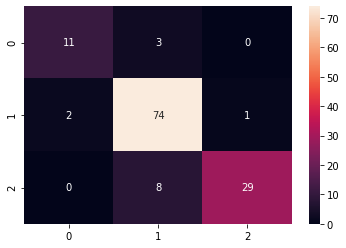

In [25]:
rf = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=3, random_state=0, n_jobs=-1)      
rf = rf.fit(X_train,y_train)

y_pred = rf.predict(X_v)
print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred, average=None)}')
confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on test set is 0.91875
f1 score on test set is [0.8        0.93193717 0.92929293]
Precision on test set is [1.         0.88118812 0.9787234 ]
Recall on test set is [0.66666667 0.98888889 0.88461538]


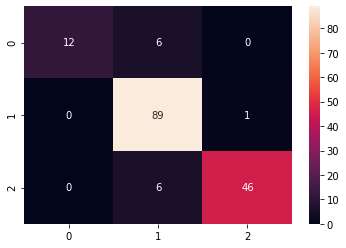

In [26]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)


compare.at['RandomForest', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')


confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
NormalizedABT = min_max_scaler.fit_transform(ABT)
NormalizedABT=pd.DataFrame(NormalizedABT, columns=selected_columns)
X_train, X_test, y_train, y_test = train_test_split(NormalizedABT, y, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
NormalizedABT.describe().T


,count,mean,std,min,25%,50%,75%,max
vehicle_localmips,800.000000,0.495096,0.293806,0.000000,0.231356,0.509561,0.756110,1.000000
total_tasks,800.000000,0.383917,0.216660,0.000000,0.215625,0.373958,0.536458,1.000000
total_task_mips,800.000000,0.386969,0.216287,0.000000,0.219722,0.377196,0.535656,1.000000
tasks_completed_local,800.000000,0.245911,0.156909,0.000000,0.131119,0.218531,0.322115,1.000000
tasks_from_others,800.000000,0.406509,0.184184,0.000000,0.262273,0.389541,0.512540,1.000000
other_task_mips,800.000000,0.407603,0.185037,0.000000,0.263319,0.390409,0.515695,1.000000
others_completed,800.000000,0.396787,0.192826,0.000000,0.241300,0.388434,0.512794,1.000000
others_failed,800.000000,0.153877,0.186707,0.000000,0.004630,0.083333,0.236111,1.000000
total_execution_time,800.000000,0.393780,0.198219,0.000000,0.248409,0.303576,0.541617,1.000000
total_computation_time,800.000000,0.470276,0.183539,0.000000,0.337190,0.419554,0.610131,1.000000


Accuracy on validation set is 0.9296875
f1 score on validation set is [0.96296296 0.94409938 0.88235294]
Precision on validation set is [1.         0.9047619  0.96774194]
Recall on validation set is [0.92857143 0.98701299 0.81081081]


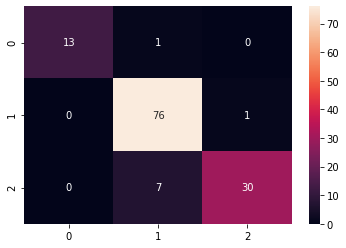

In [28]:
from sklearn import svm

clf = svm.SVC().fit(X_train, y_train)
y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred, average=None)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on test set is 0.975
f1 score on test set is [0.97142857 0.97826087 0.97029703]
Precision on test set is [1.         0.95744681 1.        ]
Recall on test set is [0.94444444 1.         0.94230769]


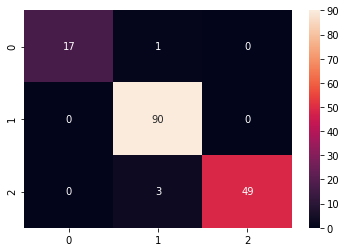

In [29]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)

compare.at['SVM', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on validation set is 0.8828125
f1 score on validation set is [0.7826087  0.91017964 0.84848485]
Precision on validation set is [1.         0.84444444 0.96551724]
Recall on validation set is [0.64285714 0.98701299 0.75675676]


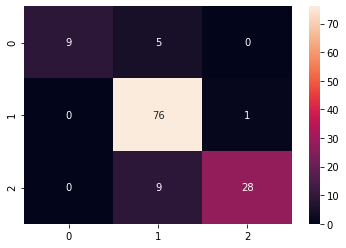

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred, average=None)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on test set is 0.9375
f1 score on test set is [0.83870968 0.94680851 0.95049505]
Precision on test set is [1.         0.90816327 0.97959184]
Recall on test set is [0.72222222 0.98888889 0.92307692]


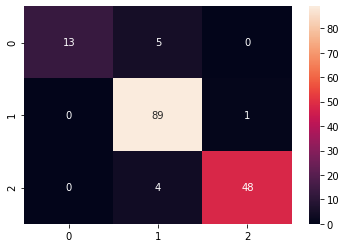

In [31]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)

compare.at['LogisticRegression', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')


confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on validation set is 0.9140625
f1 score on validation set is [0.83333333 0.93251534 0.89855072]
Precision on validation set is [1.         0.88372093 0.96875   ]
Recall on validation set is [0.71428571 0.98701299 0.83783784]


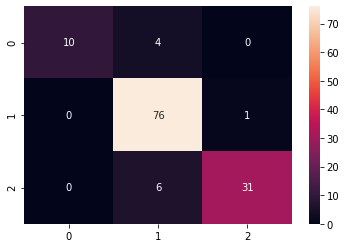

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)

y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred, average=None)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on test set is 0.94375
f1 score on test set is [0.875      0.95081967 0.95238095]
Precision on test set is [1.         0.93548387 0.94339623]
Recall on test set is [0.77777778 0.96666667 0.96153846]


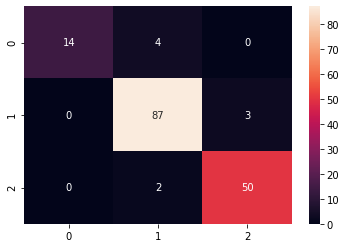

In [33]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)

compare.at['kNN', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

In [34]:
X_train, X_test, y_train, y_test = train_test_split(ABT, y, test_size=0.2, random_state=0)
X_train, X_v, y_train, y_v = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Accuracy on validation set is 0.765625
f1 score on validation set is [0.59574468 0.7826087  0.84507042]
Precision on validation set is [0.42424242 0.8852459  0.88235294]
Recall on validation set is [1.         0.7012987  0.81081081]


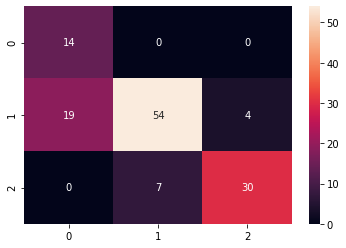

In [35]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)

y_pred = clf.predict(X_v)

print(f'Accuracy on validation set is {accuracy_score(y_v,y_pred)}')
print(f'f1 score on validation set is {f1_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Precision on validation set is {precision_score(y_true=y_v, y_pred=y_pred, average=None)}')
print(f'Recall on validation set is {recall_score(y_true=y_v, y_pred=y_pred, average=None)}')

confmat = confusion_matrix(y_v,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

Accuracy on test set is 0.83125
f1 score on test set is [0.65454545 0.83229814 0.92307692]
Precision on test set is [0.48648649 0.94366197 0.92307692]
Recall on test set is [1.         0.74444444 0.92307692]


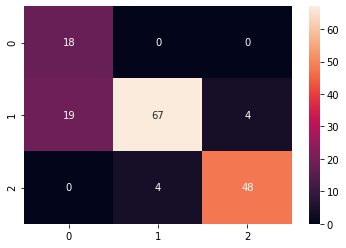

In [36]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=None)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=None)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=None)

compare.at['Naive Bayes', :] = (accuracy, f1, precision, recall)

print(f'Accuracy on test set is {accuracy}')
print(f'f1 score on test set is {f1}')
print(f'Precision on test set is {precision}')
print(f'Recall on test set is {recall}')

confmat = confusion_matrix(y_test,y_pred)
sns.heatmap(confmat,annot=True,fmt="d")

In [37]:
compare

,Accuracy,f1 score,Precision,Recall
RandomForest,0.918750,"[0.8, 0.9319371727748692, 0.9292929292929293]","[1.0, 0.8811881188118812, 0.9787234042553191]","[0.6666666666666666, 0.9888888888888889, 0.884..."
SVM,0.975000,"[0.9714285714285714, 0.9782608695652174, 0.970...","[1.0, 0.9574468085106383, 1.0]","[0.9444444444444444, 1.0, 0.9423076923076923]"
LogisticRegression,0.937500,"[0.8387096774193548, 0.946808510638298, 0.9504...","[1.0, 0.9081632653061225, 0.9795918367346939]","[0.7222222222222222, 0.9888888888888889, 0.923..."
kNN,0.943750,"[0.8750000000000001, 0.9508196721311476, 0.952...","[1.0, 0.9354838709677419, 0.9433962264150944]","[0.7777777777777778, 0.9666666666666667, 0.961..."
Naive Bayes,0.831250,"[0.6545454545454547, 0.8322981366459627, 0.923...","[0.4864864864864865, 0.9436619718309859, 0.923...","[1.0, 0.7444444444444445, 0.9230769230769231]"
